# PCA without Centering the data

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sb
import sys
import csv

In [2]:
filename = 'Dataset.csv'
raw_data = open(filename, 'rt')
reader = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
x = list(reader)
data = np.array(x).astype('float')
print(data.shape)
data


(1000, 2)


array([[ 0.143  ,  0.98493],
       [-0.30467,  0.98562],
       [ 0.46625, -0.84003],
       ...,
       [ 6.1062 , -5.9864 ],
       [-7.4094 , -5.5205 ],
       [-0.12948, -8.8036 ]])

In [3]:
#Step-1. Axis 0 indicates add the columns to calulate mean
#Do not calculate the mean. Assume data_meaned is the original data itself
data_meaned = data
data_meaned

array([[ 0.143  ,  0.98493],
       [-0.30467,  0.98562],
       [ 0.46625, -0.84003],
       ...,
       [ 6.1062 , -5.9864 ],
       [-7.4094 , -5.5205 ],
       [-0.12948, -8.8036 ]])

In [4]:
np.mean(data_meaned , axis = 0)

array([4.075e-07, 2.227e-07])

In [5]:
#Step-2
covariance_matrix  = np.cov(data_meaned , rowvar = False)

In [6]:
covariance_matrix

array([[14.7809367 ,  0.80966871],
       [ 0.80966871, 16.87223563]])

In [7]:
#Step-3
eigen_values , eigen_vectors = np.linalg.eigh(covariance_matrix)

In [8]:
eigen_values

array([14.50410886, 17.14906347])

In [9]:
eigen_vectors

array([[-0.9462227,  0.323516 ],
       [ 0.323516 ,  0.9462227]])

In [10]:
#Step-4
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]

In [11]:
sorted_index

array([1, 0], dtype=int64)

In [12]:
sorted_eigenvalue

array([17.14906347, 14.50410886])

In [13]:
sorted_eigenvectors

array([[ 0.323516 , -0.9462227],
       [ 0.9462227,  0.323516 ]])

In [14]:
#Step-5
n_components = 2
p_components_req = sorted_eigenvectors[:,0:n_components]

In [15]:
#Explained Variance
sum(sorted_eigenvalue[:n_components])/sum(sorted_eigenvalue)

1.0

In [16]:
p_components_req

array([[ 0.323516 , -0.9462227],
       [ 0.9462227,  0.323516 ]])

In [17]:
#Step-6
projected_data = np.dot(p_components_req.transpose() , data_meaned.transpose() ).transpose()

In [18]:
projected_data

array([[ 0.97822591,  0.18333077],
       [ 0.83405039,  0.60714951],
       [-0.64401612, -0.71293948],
       ...,
       [-3.68901414, -7.71452125],
       [-7.62068189,  5.22497236],
       [-8.372055  , -2.72558858]])

Text(0, 0.5, 'Y axis: Second principal component')

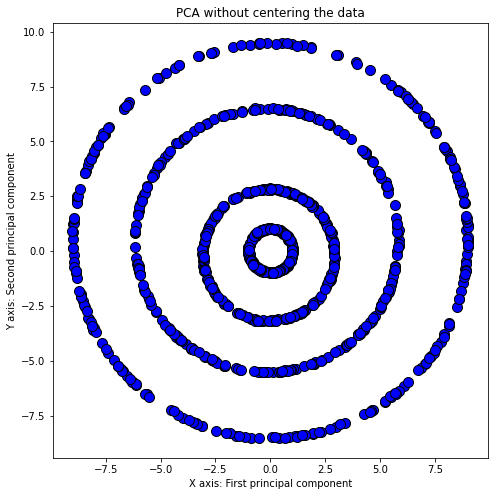

In [19]:
plt.figure(figsize=(8, 8))
plt.scatter(projected_data[:,0], projected_data[:,1], s=100, facecolor = 'b', edgecolors='k')
plt.gca().set_aspect("equal")
plt.xlabel("X axis: First principal component")
plt.title("PCA without centering the data")
plt.ylabel("Y axis: Second principal component")